In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
import scipy.sparse.linalg as spLA
import scipy
from scipy import sparse as sp
from scipy.sparse import coo_matrix,spdiags,csr_matrix

import sys
sys.path.insert(1, '../')

import SpringRank_tools as sr
import tools as tl

%load_ext autoreload
%aimport SpringRank_tools
%aimport tools
%autoreload 1

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
N = 100
beta = 0.1
alpha = 1 
K = 20
p_ij = 1 / (1 + np.exp(-2*beta))

A, s = sr.SpringRank_planted_network(N, beta, alpha, K, return_ranks=True)
s = tl.adjust_ranks(s, A, p_ij=p_ij)

s_sr = sr.SpringRank(A)
s_sr = tl.adjust_ranks(s_sr, A, p_ij=p_ij)

In [19]:
# Regression

A_n2 = np.sqrt(A.ravel())

I_left = np.zeros((N*N, N))
I_right = np.zeros((N*N, N))
for i in range(N):
    I_left[i*N:(i+1)*N, i] = 1
    I_right[i*N:(i+1)*N, :] = np.eye(N)

permute_operator = I_left - I_right
A_operator = np.diag(A_n2)
left_operator = np.matmul(A_operator, permute_operator)

In [20]:
result = scipy.linalg.lstsq(left_operator, A_n2)
s_est = result[0]
s_est = tl.adjust_ranks(s_est, A, p_ij=p_ij)

In [11]:
Q = scipy.linalg.null_space(left_operator)

print(left_operator.shape)
print(np.linalg.matrix_rank(left_operator))

(100, 10)
9


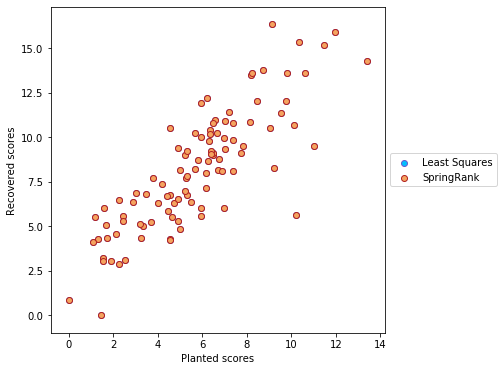

In [21]:
plt.figure(figsize=(6, 6))

plt.scatter(s, s_est, color="deepskyblue", edgecolor="slateblue", label="Least Squares")
plt.scatter(s, s_sr, color="sandybrown", edgecolor="firebrick", label="SpringRank")
plt.xlabel("Planted scores")
plt.ylabel("Recovered scores")

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
# plt.axis("square")

plt.show()

In [90]:
residuals_lstsq = np.matmul(left_operator, s_est)
norm_lstsq = LA.norm(A_n2 - residuals_lstsq)
print(norm_lstsq)

residuals_sr = np.matmul(left_operator, s_sr)
norm_sr = LA.norm(A_n2 - residuals_sr)
print(norm_sr)

149.68000755293917
156.9871738027569


In [45]:
print(permute_operator)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0. -1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0. -1.]
 [-1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0. -1.]
 [-1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  

In [49]:
print(A)

[[0. 5. 1. 2. 4. 3. 0. 1. 3. 4.]
 [1. 0. 3. 2. 3. 6. 3. 0. 3. 0.]
 [3. 4. 0. 1. 2. 1. 1. 0. 3. 0.]
 [2. 5. 3. 0. 3. 1. 3. 0. 4. 1.]
 [0. 7. 3. 3. 0. 3. 0. 1. 4. 0.]
 [2. 3. 3. 2. 4. 0. 0. 0. 6. 0.]
 [0. 4. 1. 0. 1. 1. 0. 0. 2. 0.]
 [3. 2. 3. 0. 1. 3. 0. 0. 1. 1.]
 [0. 6. 0. 1. 3. 1. 2. 1. 0. 0.]
 [1. 0. 1. 1. 0. 1. 0. 6. 0. 0.]]


In [58]:
print(left_operator)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5. -5.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  0.  0. -2.  0.  0.  0.  0.  0.  0.]
 [ 4.  0.  0.  0. -4.  0.  0.  0.  0.  0.]
 [ 3.  0.  0.  0.  0. -3.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 3.  0.  0.  0.  0.  0.  0.  0. -3.  0.]
 [ 4.  0.  0.  0.  0.  0.  0.  0.  0. -4.]
 [-1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  3. -3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0. -2.  0.  0.  0.  0.  0.  0.]
 [ 0.  3.  0.  0. -3.  0.  0.  0.  0.  0.]
 [ 0.  6.  0.  0.  0. -6.  0.  0.  0.  0.]
 [ 0.  3.  0.  0.  0.  0. -3.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  3.  0.  0.  0.  0.  0.  0. -3.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-3.  0.  3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -4.  4.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  